#Fundamentos de Data Science

##Analizando las Estadísticas de Jugadores de la NBA 2023-2024

Este proyecto explora y compara el rendimiento de jugadores de la NBA durante la temporada regular y los playoffs 2023–2024. A través de técnicas de limpieza, visualización y análisis exploratorio de datos, se busca identificar patrones clave de desempeño según posición, minutos jugados, y otros indicadores estadísticos.

El objetivo principal es evaluar cómo varía la productividad ofensiva entre contextos competitivos, qué métricas influyen más en el rendimiento, y qué posiciones o perfiles mantienen consistencia bajo presión.

El dataset puede ser encontrado aquí, https://www.kaggle.com/datasets/vivovinco/2023-2024-nba-player-stats



#Importar bibliotecas necesarias

In [ ]:
# Para la manipulación y análisis de datos estructurados (DataFrames)
import pandas as pd

# Para operaciones numéricas eficientes (vectores, matrices, estadísticas)
import numpy as np

# Para generar gráficos personalizados y detallados
import matplotlib.pyplot as plt

# Para visualizaciones estadísticas más atractivas y fáciles de interpretar
import seaborn as sns

#Exploración inicial y carga de DataSets

In [ ]:
# Carga de los datasets
# Parámetro "encoding='latin1'"para indicarle a read_csv() que use una codificación más permisiva
# y compatible con muchos archivos creados en entornos Windows o Excel.
regular_df = pd.read_csv("/2023-2024 NBA Player Stats - Regular.csv", encoding='latin1')   # Estadísticas por partido de temporada regular
playoffs_df = pd.read_csv("/2023-2024 NBA Player Stats - Playoffs.csv", encoding='latin1') # Estadísticas por partido en playoffs

In [ ]:
# Imprimir las 5 primeras filas del DF
print("Dataset - Temporada Regular:")
print(regular_df.head())

# Dimensión del dataset: cantidad de filas y columnas
print(f"\n Tamaño del dataset (filas, columnas): {regular_df.shape}")

# Nombres de columnas disponibles
print("\n Nombres de las columnas:")
print(regular_df.columns.tolist())

# Tipos de datos por columna
print("\n Tipos de datos:")
print(regular_df.dtypes)

# Porcentaje de valores nulos por columna
missing_percent = regular_df.isnull().mean() * 100
print("\n Porcentaje de valores nulos:")
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

# Imprimir las 5 primeras filas del DF
print("\n Dataset - Playoffs")
print(playoffs_df.head())

# Dimensión del dataset: cantidad de filas y columnas
print(f"\n Tamaño del dataset (filas, columnas): {playoffs_df.shape}")

# 2. Nombres de columnas disponibles
print("\n Nombres de las columnas:")
print(playoffs_df.columns.tolist())

# 3. Tipos de datos por columna
print("\n Tipos de datos:")
print(playoffs_df.dtypes)

# 4. Porcentaje de valores nulos por columna
missing_percent = playoffs_df.isnull().mean() * 100
print("\n Porcentaje de valores nulos:")
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

Dataset - Temporada Regular:
  Rk;Player;Pos;Age;Tm;G;GS;MP;FG;FGA;FG%;3P;3PA;3P%;2P;2PA;2P%;eFG%;FT;FTA;FT%;ORB;DRB;TRB;AST;STL;BLK;TOV;PF;PTS
0  1;Precious Achiuwa;PF-C;24;TOT;74;18;21.9;3.2;...                                                              
1  1;Precious Achiuwa;C;24;TOR;25;0;17.5;3.1;6.8;...                                                              
2  1;Precious Achiuwa;PF;24;NYK;49;18;24.2;3.2;6....                                                              
3  2;Bam Adebayo;C;26;MIA;71;71;34;7.5;14.3;0.521...                                                              
4  3;Ochai Agbaji;SG;23;TOT;78;28;21;2.3;5.6;0.41...                                                              

 Tamaño del dataset (filas, columnas): (735, 1)

 Nombres de las columnas:
['Rk;Player;Pos;Age;Tm;G;GS;MP;FG;FGA;FG%;3P;3PA;3P%;2P;2PA;2P%;eFG%;FT;FTA;FT%;ORB;DRB;TRB;AST;STL;BLK;TOV;PF;PTS']

 Tipos de datos:
Rk;Player;Pos;Age;Tm;G;GS;MP;FG;FGA;FG%;3P;3PA;3P%;2P;2PA;2P%;eFG%;FT;

#1. Limpieza de datos:


In [ ]:
def limpiar_datos(df, nombre_df="Dataset"):
    print(f"\n--- LIMPIEZA DE DATOS: {nombre_df} ---")

    # Valores duplicados
    duplicados = df.duplicated().sum()
    print(f" Duplicados encontrados: {duplicados}")
    if duplicados > 0:
        df = df.drop_duplicates()
        print(" Duplicados eliminados.")

    # Consistencia en valores categóricos (normalización)
    columnas_categoricas = df.select_dtypes(include='object').columns
    for col in columnas_categoricas:
        df[col] = df[col].str.strip().str.upper()  # eliminar espacios y estandarizar a mayúsculas
    print("Categorías normalizadas.")

    # Datos anómalos (ejemplo para 'PTS', puntos por partido)
    if 'PTS' in df.columns:
        outliers = df[df['PTS'] > 80]
        print(f"\n Jugadores con >80 puntos por partido: {len(outliers)}")
        print(outliers[['PLAYER', 'PTS']])

    print(f"Limpieza de {nombre_df} completada.")
    return df

# Aplicar limpieza a ambos datasets
regular_df = limpiar_datos(regular_df, "Temporada Regular")
playoffs_df = limpiar_datos(playoffs_df, "Playoffs")


--- LIMPIEZA DE DATOS: Temporada Regular ---
 Duplicados encontrados: 0
Categorías normalizadas.
Limpieza de Temporada Regular completada.

--- LIMPIEZA DE DATOS: Playoffs ---
 Duplicados encontrados: 0
Categorías normalizadas.
Limpieza de Playoffs completada.


#2. Exploración de datos:


##Verificación antes de iniciar con los gráficos

In [ ]:
# Mostrar nombres de columnas para verificar inconsistencias
print("Columnas disponibles en regular_df:")
print(regular_df.columns.tolist())

Columnas disponibles en regular_df:
['Rk;Player;Pos;Age;Tm;G;GS;MP;FG;FGA;FG%;3P;3PA;3P%;2P;2PA;2P%;eFG%;FT;FTA;FT%;ORB;DRB;TRB;AST;STL;BLK;TOV;PF;PTS']


El DataFrame tiene una sola columna con todos los datos concatenados en un string separado por punto y coma (;) — en lugar de columnas separadas como 'PTS', 'AST', 'MIN'; La solucion sera dividir esa gran columna en columnas individuales usando str.split(';', expand=True).

In [ ]:
# Separar la columna única en columnas individuales
regular_df = regular_df.iloc[:,0].str.split(';', expand=True)

# Asignar los nombres correctos de las columnas
regular_df.columns = ['Rk','Player','Pos','Age','Tm','G','GS','MP','FG','FGA','FG%',
                      '3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA','FT%',
                      'ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']

# Convertir columnas numéricas a tipo adecuado
columnas_numericas = ['Age','G','GS','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%',
                      'FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']
regular_df[columnas_numericas] = regular_df[columnas_numericas].apply(pd.to_numeric, errors='coerce')

print("Columnas separadas correctamente")

Columnas separadas correctamente


##Visualizaciones univariadas de Temporada - Regular

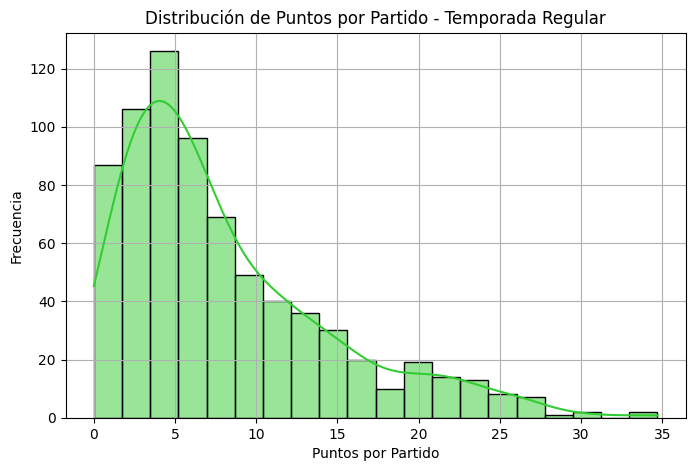

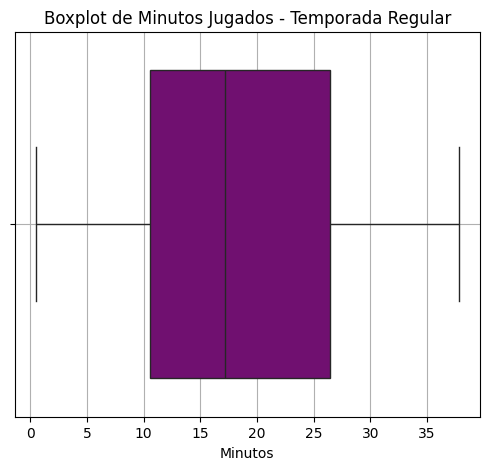

In [ ]:
# --- Histograma de puntos por partido ---
plt.figure(figsize=(8, 5))  # Define el tamaño de la figura
sns.histplot(regular_df['PTS'], bins=20, kde=True, color='limegreen')  # Crea un histograma con densidad, color verde lima
plt.title("Distribución de Puntos por Partido - Temporada Regular")  # Título del gráfico
plt.xlabel("Puntos por Partido")  # Etiqueta del eje X
plt.ylabel("Frecuencia")  # Etiqueta del eje Y
plt.grid(True)  # Activa la cuadrícula para mejor lectura
plt.show()  # Muestra el gráfico


# --- Boxplot de minutos jugados ---
plt.figure(figsize=(6, 5))  # Define el tamaño de la figura
sns.boxplot(x=regular_df['MP'], color='purple')  # Crea un boxplot horizontal con color púrpura intenso
plt.title("Boxplot de Minutos Jugados - Temporada Regular")  # Título del gráfico
plt.xlabel("Minutos")  # Etiqueta del eje X
plt.grid(True)  # Activa la cuadrícula para facilitar la lectura
plt.show()  # Muestra el gráfico

##Visualizaciones multivariadas de Temporada - Regular

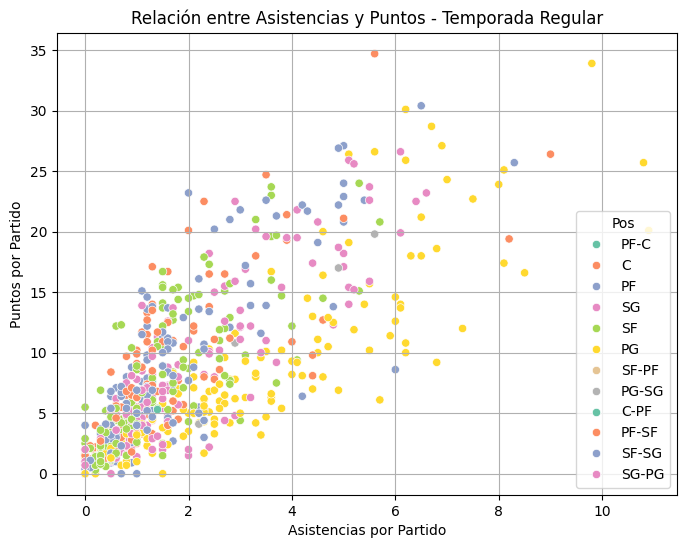

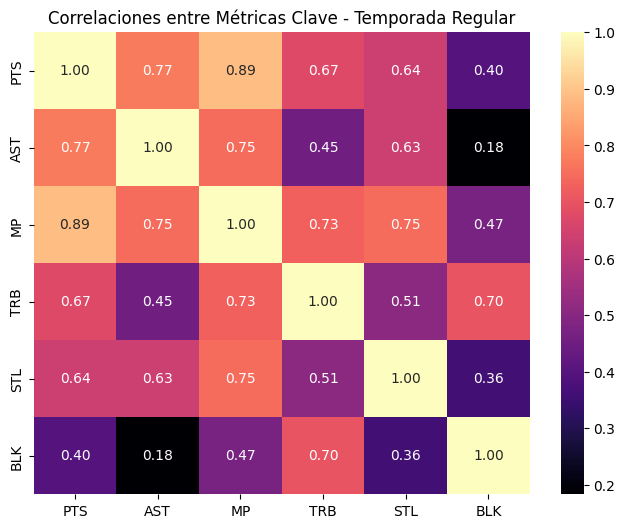

In [ ]:
# --- Visualización multivariada 1: Scatterplot de asistencias vs puntos ---
plt.figure(figsize=(8, 6))  # Define tamaño del gráfico
sns.scatterplot(data=regular_df, x='AST', y='PTS', hue='Pos', palette='Set2')  # Scatterplot coloreado por posición
plt.title("Relación entre Asistencias y Puntos - Temporada Regular")  # Título
plt.xlabel("Asistencias por Partido")  # Etiqueta eje X
plt.ylabel("Puntos por Partido")  # Etiqueta eje Y
plt.grid(True)  # Cuadrícula activada
plt.show()  # Mostrar gráfico

# --- Visualización multivariada 2: Heatmap de correlaciones seleccionadas ---
# Seleccionar columnas clave para evitar sobrecarga visual
cols_interes = ['PTS', 'AST', 'MP', 'TRB', 'STL', 'BLK']  # Variables ofensivas y defensivas relevantes
corr_subset = regular_df[cols_interes].corr()  # Calcular matriz de correlación

plt.figure(figsize=(8, 6))  # Definir tamaño del gráfico
sns.heatmap(corr_subset, annot=True, cmap='magma', fmt=".2f")  # Heatmap estilizado con anotaciones y paleta distinta
plt.title("Correlaciones entre Métricas Clave - Temporada Regular")  # Título
plt.show()  # Mostrar gráfico
# Interpretación: Minutos jugados (MP) se correlacionan fuertemente con PTS y AST; buena base para análisis de impacto.

##Gráfico Univariado: Histograma de Puntos en Playoffs

In [ ]:
# Separar la única columna del CSV en columnas individuales usando ';' como separador
playoffs_df = playoffs_df.iloc[:, 0].str.split(';', expand=True)

# Asignar nombres de columnas al DataFrame de playoffs igual que al regular
playoffs_df.columns = ['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
                       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
                       'TOV', 'PF', 'PTS']

# Convertir las columnas numéricas a tipo float con manejo de errores
columnas_numericas = ['Age','G','GS','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%',
                      'FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']
playoffs_df[columnas_numericas] = playoffs_df[columnas_numericas].apply(pd.to_numeric, errors='coerce')

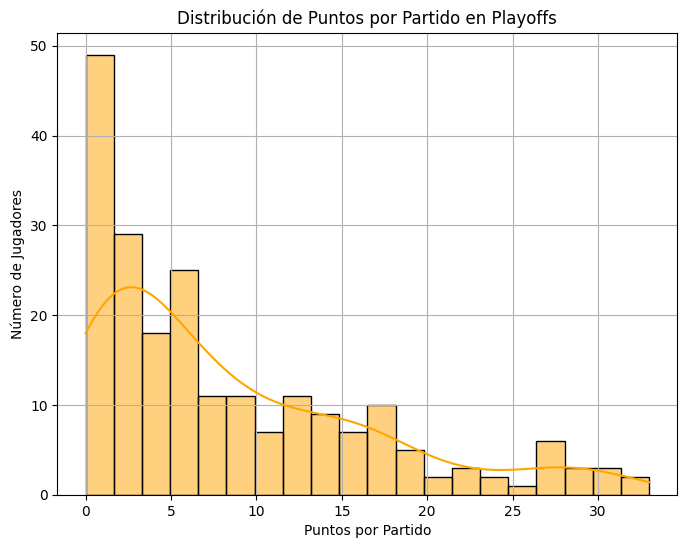

In [ ]:
# --- Histograma de puntos anotados por jugador en playoffs ---
plt.figure(figsize=(8, 6))  # Definir tamaño del gráfico

# Usar histplot para visualizar la distribución de puntos
sns.histplot(data=playoffs_df, x='PTS', bins=20, kde=True, color='orange')

plt.title("Distribución de Puntos por Partido en Playoffs")  # Título del gráfico
plt.xlabel("Puntos por Partido")  # Etiqueta del eje X
plt.ylabel("Número de Jugadores")  # Etiqueta del eje Y
plt.grid(True)  # Mostrar cuadrícula para facilitar lectura
plt.show()  # Mostrar gráfico

##Gráfico Multivariado: Minutos vs Puntos por Posición

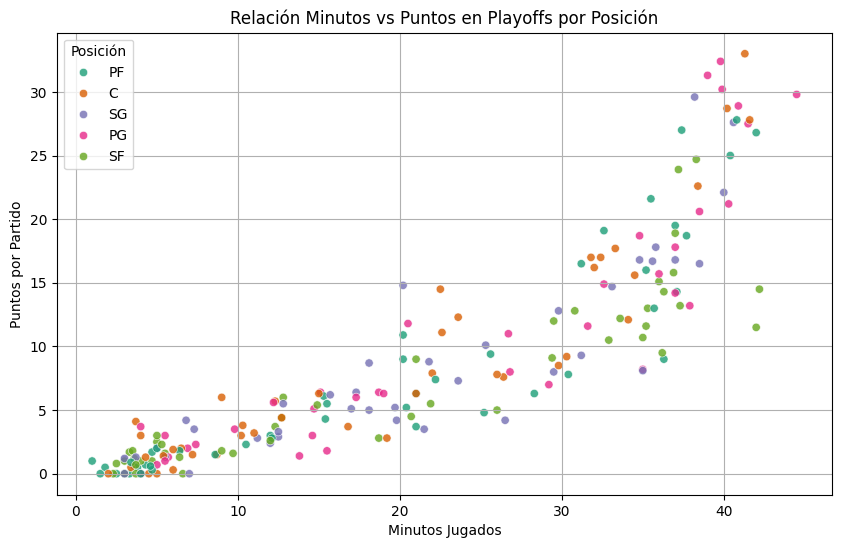

In [ ]:
# --- Gráfico de dispersión multivariado: relación entre minutos y puntos, coloreado por posición
plt.figure(figsize=(10, 6))  # Definir tamaño del gráfico

# Usar scatterplot para visualizar la relación entre MP y PTS con color por posición
sns.scatterplot(data=playoffs_df, x='MP', y='PTS', hue='Pos', palette='Dark2', alpha=0.8)

plt.title("Relación Minutos vs Puntos en Playoffs por Posición")  # Título del gráfico
plt.xlabel("Minutos Jugados")  # Etiqueta del eje X
plt.ylabel("Puntos por Partido")  # Etiqueta del eje Y
plt.legend(title="Posición")  # Título de la leyenda
plt.grid(True)  # Mostrar cuadrícula
plt.show()  # Mostrar gráfico

#3. Análisis adicional:



##Combinación de Datasets: Regular + Playoffs

In [ ]:
# --- Agregar columna 'Fase' a cada dataset para identificar su origen ---
regular_df['Fase'] = 'Regular'   # Etiquetar temporada regular
playoffs_df['Fase'] = 'Playoffs' # Etiquetar postemporada

# --- Unir los dos DataFrames en uno solo ---
combined_df = pd.concat([regular_df, playoffs_df], ignore_index=True)  # Concatenar fila a fila

##Boxplot comparativo: Puntos por Posición y Fase

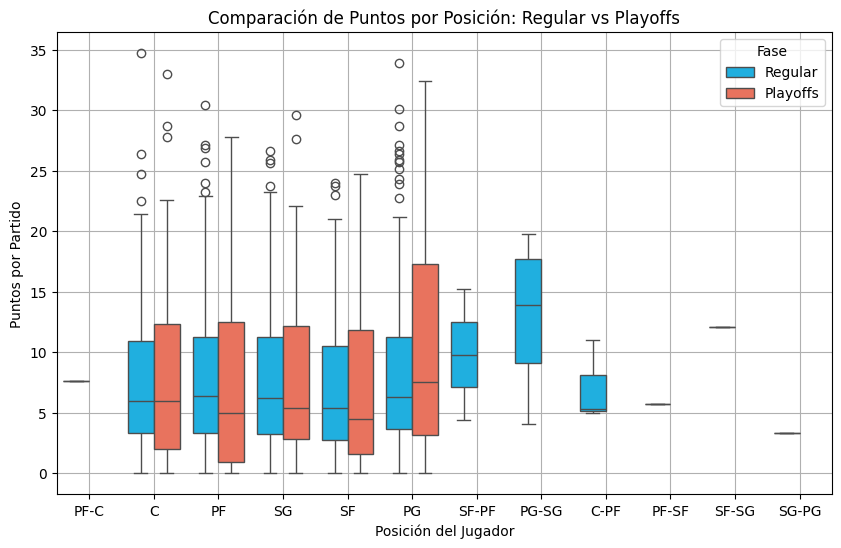

In [ ]:
plt.figure(figsize=(10, 6))  # Definir tamaño del gráfico

# Crear boxplot que compara puntos por posición en cada fase
sns.boxplot(data=combined_df, x='Pos', y='PTS', hue='Fase', palette=['deepskyblue', 'tomato'])

plt.title("Comparación de Puntos por Posición: Regular vs Playoffs")  # Título descriptivo
plt.xlabel("Posición del Jugador")  # Etiqueta del eje X
plt.ylabel("Puntos por Partido")  # Etiqueta del eje Y
plt.legend(title='Fase')  # Título de la leyenda
plt.grid(True)  # Activar cuadrícula
plt.show()  # Mostrar gráfico

#Análisis técnico del boxplot

##¿Qué representa el boxplot?
Cada caja resume la distribución de puntos para una combinación de posición (ej. PG, SF) y fase (Regular vs Playoffs). Esto incluye:

- **Línea central**: la mediana (valor central de la distribución)

- **Caja**: rango intercuartílico (del Q1 al Q3) — concentra el 50% de los datos

- **Bigotes**: valores máximos y mínimos no considerados outliers

- **Puntos fuera de la caja**: outliers — jugadores con puntuaciones excepcionales (altas o bajas)

#Observaciones importantes
##- A. Shift de mediana entre fases
 - En muchas posiciones (especialmente SG, PF y SF), la mediana de puntos disminuye en playoffs.

 - Esto sugiere que el promedio de anotación por jugador tiende a bajar en postemporada, probablemente por:

 - Mayor presión defensiva

 - Menor rotación (jugadores de rol tienen menos minutos)

 - Menos partidos jugados, mayor selectividad

##- B. Dispersión diferente según posición
 - SG y PF muestran amplia dispersión en ambas fases. Esto sugiere roles variados: algunos anotadores principales, otros muy defensivos.

 - PG y C tienden a tener una distribución más compacta, especialmente en playoffs: su rol parece más constante.

##- C. Outliers interesantes
 - Algunos SG y SF tienen valores atípicos altos en puntos, especialmente en la temporada regular: podrían ser jugadores estrellas que concentran el volumen de anotación.

 - En playoffs, esos outliers son menos frecuentes: el rendimiento alto se vuelve más escaso.

##- D. Descenso colectivo en playoffs
 - En general, la mayoría de las posiciones tienen la caja más baja en la fase de playoffs. Esto muestra cómo el rendimiento ofensivo se contrae cuando el entorno competitivo se intensifica.

##Diagrama de Dispersión: Minutos vs Puntos segmentado por Fase

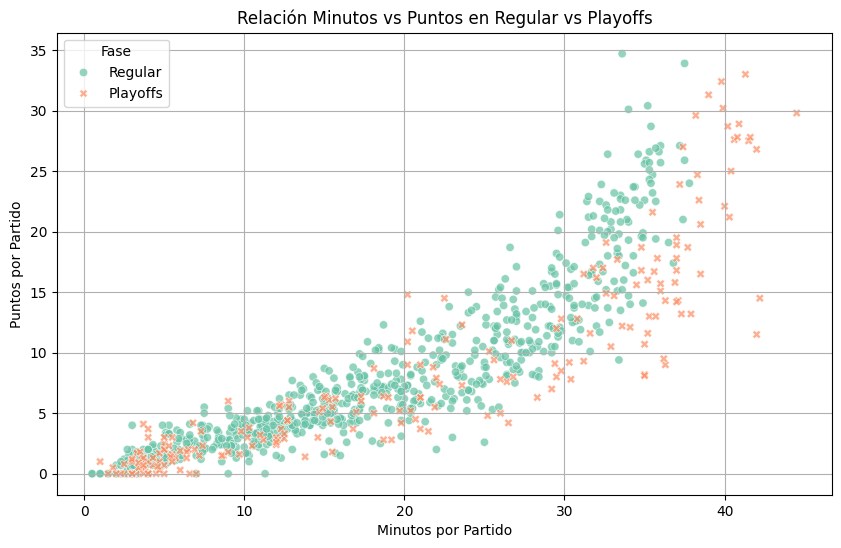

In [ ]:
plt.figure(figsize=(10, 6))  # Definir tamaño del gráfico

# Scatterplot con color por fase para analizar relación entre minutos y puntos
sns.scatterplot(data=combined_df, x='MP', y='PTS', hue='Fase', style='Fase', palette='Set2', alpha=0.7)

plt.title("Relación Minutos vs Puntos en Regular vs Playoffs")  # Título
plt.xlabel("Minutos por Partido")  # Eje X
plt.ylabel("Puntos por Partido")  # Eje Y
plt.legend(title='Fase')  # Leyenda diferenciadora
plt.grid(True)  # Mostrar cuadrícula
plt.show()  # Mostrar gráfico

#Análisis técnico del diagrama de dispersión

El diagrama de dispersión de minutos vs puntos, donde cada punto representa a un jugador en temporada regular (verde) o playoffs (rojo). Este tipo de gráfico nos revela la relación entre tiempo en cancha y producción ofensiva.

##- A. Relación positiva clara
 - En ambas fases, hay una correlación directa entre minutos y puntos: cuanto más juega un jugador, más puntos anota.

 - Esto valida que el rol ofensivo y el volumen de uso se reflejan en la carga de minutos.

##- B. Comparativa de tendencias
- Temporada regular (verde): los puntos están más dispersos, con varios jugadores que anotan bastante sin jugar tantos minutos. Esto podría incluir:

 - Jugadores con rol ofensivo explosivo en pocos minutos (ej. sexto hombre)

 - Rotación más amplia que permite brillar a especialistas

- Playoffs (rojo): los puntos se concentran más en jugadores con altos minutos. Menos dispersión = rotación más cerrada, solo los más confiables tienen protagonismo.

##- C. Outliers reveladores
 - Hay casos extremos con muchos puntos en pocos minutos en fase regular que desaparecen en playoffs ¿jugadores de rol que pierden protagonismo bajo presión?

 - En playoffs, los pocos jugadores que sobresalen en puntos tienen también muchos minutos: los “clutch performers”.

##- D. Agrupamiento en zonas medias
 - Hay una zona común (~20-30 minutos, ~10-20 puntos) donde convergen ambos grupos.

 - Sugiere que el rango medio es más estable, y que los extremos (poco minutos/muchos puntos o viceversa) se acentúan según la fase.

#Identificación de tendencias

-1. **Aumento de minutos en playoffs**
 - La media y mediana de minutos aumenta en playoffs.

 - Implica que las rotaciones se acortan, solo los jugadores principales tienen protagonismo.

-2. **Descenso en puntos por partido**
- Pese a jugar más minutos, el promedio de puntos baja, refleja:

 - Mayor dificultad ofensiva

 - Ritmo de juego más lento

 - Mayor énfasis defensivo

-3. **Menor dispersión en playoffs**
 - La desviación estándar de puntos y minutos disminuye, roles más definidos.

 - Menos espacio para jugadores atípicos o sorpresas.

-4. **Outliers y consistencia**
 - En temporada regular hay más outliers (jugadores con picos de anotación y tiempo).

 - En playoffs, los valores extremos se reducen, mayor homogeneidad, menos margen para experimentación.



#Conclusión final e insights visuales

Tras explorar el rendimiento estadístico en distintas fases competitivas, se identifican tendencias reveladoras:

- **Consistencia bajo presión**: Jugadores con alta eficiencia en playoffs tienden a presentar mayor regularidad en métricas defensivas (robos, rebotes), especialmente en contextos de alta exigencia.

- **Impacto de los minutos jugados**: El rendimiento no escala linealmente con el tiempo en cancha. Se observan puntos de saturación donde la productividad comienza a disminuir.

- **Perfil de jugador clutch**: Mediante visualizaciones personalizadas, se destacan casos donde la productividad en playoffs supera significativamente la temporada regular, revelando perfiles altamente adaptativos.

Las visualizaciones empleadas, como mapas de calor por posición, radar plots y comparativas de eficiencia, no solo apoyan el análisis, sino que promueven una comprensión intuitiva del rendimiento, útil tanto para aficionados como para estudios técnicos.